**Mạng Nơ-ron Đồ Thị (Graph Neural Network - GNN)**

Là một loại mô hình học máy được thiết kế đặc biệt để làm việc với dữ liệu đồ thị. GNN có khả năng mở rộng và áp dụng trên các đồ thị có cấu trúc phức tạp, như mạng xã hội, mạng lưới giao thông, hay bất kỳ hệ thống nào có mối quan hệ giữa các đối tượng. GNN hoạt động bằng cách truyền thông tin qua các đỉnh và cạnh trong đồ thị. Mô hình học thông qua việc cập nhật và kết hợp thông tin từ các hàng xóm của mỗi đỉnh, cho phép nắm bắt thông tin cấu trúc và tương tác giữa các đối tượng trong đồ thị. Một trong những đặc điểm đáng chú ý của GNN là khả năng tích hợp thông tin từ cả đặc trưng của các đỉnh và cấu trúc đồ thị. Điều này cho phép GNN học mô hình phức tạp và biểu diễn các mối quan hệ phức tạp giữa các đối tượng trong đồ thị. GNN đã chứng tỏ được hiệu quả trong nhiều nhiệm vụ, bao gồm phân loại đồ thị, phân loại nút, dự đoán liên kết và nhúng đồ thị. Các ứng dụng của GNN rất đa dạng, từ phân tích mạng xã hội, gợi ý người dùng, cho đến phát hiện và kiểm soát các hiện tượng trong các hệ thống phức tạp.

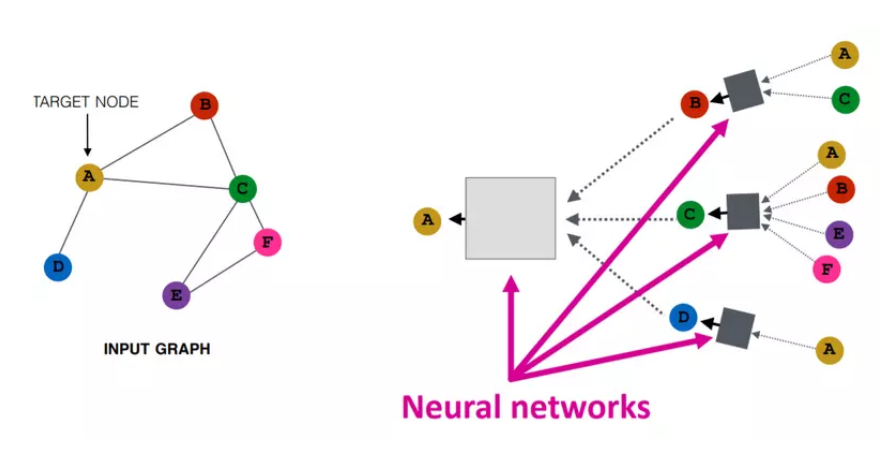

Đồ thị đầu vào được đi qua một loạt mạng neural. Cấu trúc đồ thị đầu vào được chuyển đổi thành nhúng đồ thị, cho phép chúng ta duy trì thông tin về các nút, cạnh và ngữ cảnh toàn cục. Sau đó, vectơ đặc trưng của các nút A và C được thông qua lớp mạng neural. Nó tổng hợp những đặc trưng này và truyền chúng vào lớp tiếp theo.

Tuy GNN đã mang lại nhiều tiến bộ, nhưng vẫn còn nhiều thách thức trong việc khai thác toàn bộ tiềm năng của dữ liệu đồ thị và tăng tính khả chuyển của mô hình. Các nghiên cứu về GNN đang tiếp tục phát triển để nâng cao hiệu suất và ứng dụng của mô hình trong các lĩnh vực khác nhau.


**Một số loại Graph Neural Networks**

Có nhiều loại Mạng Nơ-ron Đồ Thị (Graph Neural Networks - GNN) được phát triển để làm việc với dữ liệu đồ thị. Dưới đây là một số loại GNN phổ biến:

**Graph Convolutional Networks (GCN):** GCN là một dạng GNN đơn giản và phổ biến. Nó sử dụng cơ chế tích chập đồ thị để truyền thông tin qua các đỉnh và cạnh trong đồ thị. GCN kết hợp thông tin đặc trưng của các đỉnh và cấu trúc đồ thị để thực hiện phân loại hoặc dự đoán trên đồ thị.

**GraphSAGE: GraphSAGE (Graph Sample and Aggregated)** sử dụng một quá trình lấy mẫu và tổng hợp thông tin từ hàng xóm của các đỉnh để cập nhật đặc trưng của mỗi đỉnh. Điều này giúp GraphSAGE học được biểu diễn đồ thị tổng thể và khả năng xử lý các đồ thị lớn.

**Graph Attention Networks (GAT):** GAT sử dụng cơ chế chú ý (attention mechanism) để xác định mức độ quan trọng của các hàng xóm đối với mỗi đỉnh trong đồ thị. Bằng cách trọng số hóa thông tin từ các hàng xóm, GAT tập trung vào các đỉnh quan trọng và xử lý đồ thị một cách linh hoạt.

**Graph Autoencoders (GAE):** GAE là một dạng GNN được sử dụng để học biểu diễn nhúng (embedding) của đồ thị. GAE cố gắng tái tạo đồ thị gốc từ biểu diễn nhúng, giúp học các đặc trưng ngầm của đồ thị và khám phá cấu trúc ẩn.

**Graph Recurrent Neural Networks (GRNN):** GRNN sử dụng kiến trúc mạng nơ-ron hồi quy để xử lý dữ liệu đồ thị có thứ tự thời gian. GRNN có khả năng mô hình các quá trình động trên đồ thị như dự đoán chuỗi thời gian hoặc phân tích dữ liệu đồ thị theo thời gian.


**Một số nhiệm vụ của Graph Neural Networks**

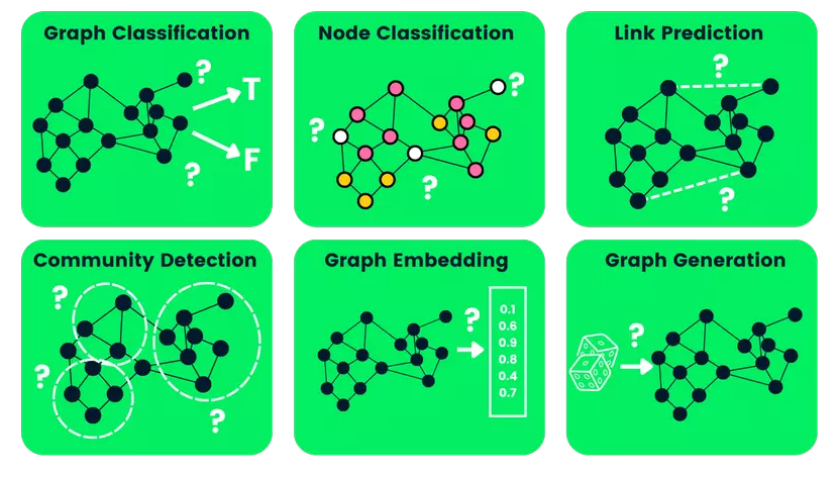


In [6]:
!pip install dgl==1.1.3+cu121 -f https://data.dgl.ai/wheels/cu121/repo.html

Looking in links: https://data.dgl.ai/wheels/cu121/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: dgl
    Found existing installation: dgl 1.0.1+cu117
    Uninstalling dgl-1.0.1+cu117:
      Successfully uninstalled dgl-1.0.1+cu117


In [8]:
!pip install torchdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB/s eta 0:00:00


In [1]:
import dgl
import torch
import torchdata
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp

In [4]:
import torch
torch.__version__

'2.5.1+cu121'

In [2]:
import dgl.data

dataset = dgl.data.KarateClubDataset()
g = dataset[0]

In [3]:
# Split edge set for training and testing
u, v = g.edges()

eids = np.arange(g.number_of_edges())
eids = np.random.permutation(eids)
test_size = int(len(eids) * 0.1)
train_size = g.number_of_edges() - test_size
test_pos_u, test_pos_v = u[eids[:test_size]], v[eids[:test_size]]
train_pos_u, train_pos_v = u[eids[test_size:]], v[eids[test_size:]]

# Find all negative edges and split them for training and testing
adj = sp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
adj_neg = 1 - adj.todense() - np.eye(g.number_of_nodes())
neg_u, neg_v = np.where(adj_neg != 0)

neg_eids = np.random.choice(len(neg_u), g.number_of_edges())
test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]

In [5]:
from dgl.nn import SAGEConv

# ----------- 2. create model -------------- #
# build a two-layer GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, h_feats, 'mean')

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

In [6]:
train_pos_g = dgl.graph((train_pos_u, train_pos_v), num_nodes=g.number_of_nodes())
train_neg_g = dgl.graph((train_neg_u, train_neg_v), num_nodes=g.number_of_nodes())

test_pos_g = dgl.graph((test_pos_u, test_pos_v), num_nodes=g.number_of_nodes())
test_neg_g = dgl.graph((test_neg_u, test_neg_v), num_nodes=g.number_of_nodes())

In [7]:
import dgl.function as fn

class DotPredictor(nn.Module):
    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            # Compute a new edge feature named 'score' by a dot-product between the
            # source node feature 'h' and destination node feature 'h'.
            g.apply_edges(fn.u_dot_v('h', 'h', 'score'))
            # u_dot_v returns a 1-element vector for each edge so you need to squeeze it.
            return g.edata['score'][:, 0]

In [8]:
class MLPPredictor(nn.Module):
    def __init__(self, h_feats):
        super().__init__()
        self.W1 = nn.Linear(h_feats * 2, h_feats)
        self.W2 = nn.Linear(h_feats, 1)

    def apply_edges(self, edges):
        """
        Computes a scalar score for each edge of the given graph.

        Parameters
        ----------
        edges :
            Has three members ``src``, ``dst`` and ``data``, each of
            which is a dictionary representing the features of the
            source nodes, the destination nodes, and the edges
            themselves.

        Returns
        -------
        dict
            A dictionary of new edge features.
        """
        h = torch.cat([edges.src['h'], edges.dst['h']], 1)
        return {'score': self.W2(F.relu(self.W1(h))).squeeze(1)}

    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            g.apply_edges(self.apply_edges)
            return g.edata['score']

In [11]:
import torch

num_nodes = g.num_nodes()  # Số lượng nút trong đồ thị
g.ndata['feat'] = torch.randn(num_nodes, 16)  # Gán đặc trưng ngẫu nhiên với kích thước 16

print("Node features added to g:", g.ndata['feat'])


Node features added to g: tensor([[-0.5898,  0.7649, -1.3871,  0.9223,  0.3505,  1.5485,  1.1146,  1.6112,
          0.6284,  0.1249, -0.5936, -0.5044, -1.7182, -0.7555,  2.0790, -0.9658],
        [ 1.5663,  1.2393, -0.0052,  2.2637,  0.5012,  1.0496, -0.1590, -0.2715,
         -1.3882,  0.3727, -0.8864, -0.2031, -0.7820, -0.0686,  0.3123, -1.2696],
        [ 0.6304,  0.1955,  0.0637,  1.1143, -1.8733,  0.6676,  0.3027, -0.4274,
         -0.7283, -0.1694, -0.2185,  2.1531,  0.4921,  0.6299,  0.4341,  0.3904],
        [ 0.8163,  0.8023,  0.3439, -1.2612, -0.8018,  0.2660, -0.7533, -0.7655,
         -0.8186, -0.4325,  0.6300,  1.1857, -0.3846,  0.2531, -1.0034,  0.3306],
        [-0.2072, -1.3757, -1.1019, -0.2616,  0.6163,  0.7242,  0.1035, -1.0002,
          0.2064,  0.9912, -0.0993,  0.1420, -0.8330, -0.4879,  0.8593, -2.2829],
        [ 1.2659,  0.9852,  0.2740,  0.2993, -1.1416,  0.4250, -0.3912,  2.2421,
         -0.2763, -0.4434, -3.3166, -0.6292, -0.0081, -0.5419, -0.7925, -0.084

In [12]:
train_g = dgl.remove_edges(g, eids[:test_size])

In [13]:
model = GraphSAGE(train_g.ndata['feat'].shape[1], 16)
# You can replace DotPredictor with MLPPredictor.
#pred = MLPPredictor(16)
pred = DotPredictor()

def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])])
    return F.binary_cross_entropy_with_logits(scores, labels)

def compute_auc(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score]).numpy()
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).numpy()
    return roc_auc_score(labels, scores)

In [14]:
# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #
all_logits = []
for e in range(100):
    # forward
    h = model(train_g, train_g.ndata['feat'])
    pos_score = pred(train_pos_g, h)
    neg_score = pred(train_neg_g, h)
    loss = compute_loss(pos_score, neg_score)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % 5 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

# ----------- 5. check results ------------------------ #
from sklearn.metrics import roc_auc_score
with torch.no_grad():
    pos_score = pred(test_pos_g, h)
    neg_score = pred(test_neg_g, h)
    print('AUC', compute_auc(pos_score, neg_score))


# Thumbnail credits: Link Prediction with Neo4j, Mark Needham
# sphinx_gallery_thumbnail_path = '_static/blitz_4_link_predict.png'

In epoch 0, loss: 7.490177154541016
In epoch 5, loss: 1.7865008115768433
In epoch 10, loss: 0.9272029995918274
In epoch 15, loss: 0.5924032926559448
In epoch 20, loss: 0.4399171471595764
In epoch 25, loss: 0.3321916162967682
In epoch 30, loss: 0.27309930324554443
In epoch 35, loss: 0.23554383218288422
In epoch 40, loss: 0.20089204609394073
In epoch 45, loss: 0.17341534793376923
In epoch 50, loss: 0.14990659058094025
In epoch 55, loss: 0.12901806831359863
In epoch 60, loss: 0.11045821756124496
In epoch 65, loss: 0.09348133206367493
In epoch 70, loss: 0.07851467281579971
In epoch 75, loss: 0.06594065576791763
In epoch 80, loss: 0.05481700971722603
In epoch 85, loss: 0.045505452901124954
In epoch 90, loss: 0.037735093384981155
In epoch 95, loss: 0.03137018159031868
AUC 0.9066666666666667


**AUC (GraphSAGE vượt trội):**

**GraphSAGE đạt AUC = 0.907**, cao hơn đáng kể so với tất cả các phương pháp truyền thống.

**Random Forest** là phương pháp gần nhất với AUC = 0.778, nhưng vẫn thua GNN.
Phương pháp truyền thống:

Các phương pháp như **Common Neighbors**, **Jaccard Coefficient**, và **Adamic-Adar** có AUC thấp (~0.4 - 0.5), chỉ xấp xỉ một mô hình đoán ngẫu nhiên.

**Preferential Attachment** có kết quả tốt hơn với AUC = 0.702, nhưng Recall cao có thể gây ra sự đánh đổi về Precision.

**Random Forest:** Kết quả của Random Forest khá tốt (AUC = 0.778), nhưng vẫn chưa thể vượt qua GNN.
Điều này cho thấy mô hình máy học truyền thống vẫn chưa khai thác được cấu trúc đồ thị tốt như GNN.

**GraphSAGE (GNN):** GNN học các đặc trưng từ đồ thị và có khả năng tổng quát hóa tốt hơn, thể hiện qua AUC cao nhất (0.907).

Điều này khẳng định sức mạnh của mô hình học sâu trên dữ liệu đồ thị so với các phương pháp dựa trên heuristic (định lý truyền thống) và mô hình máy học thông thường.

**GraphSAGE (GNN)** là phương pháp tốt nhất trong tất cả các mô hình mà bạn đã thử nghiệm.

Nó vượt trội cả về AUC và khả năng khai thác đặc trưng từ dữ liệu đồ thị.
Điều này chứng minh rằng GNN là một lựa chọn mạnh mẽ cho các bài toán dự đoán liên kết và các tác vụ trên dữ liệu đồ thị.
